<a href="https://colab.research.google.com/github/NayeemHossenJim/Task-Assignment-AI-ML-Engineer-Position-at-BBS/blob/main/TaskUsingClassification_(Nayeem_Hossen_Jim).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Kaggle On Google Colab**

In [1]:
! pip install kaggle

# Connect Kaggle Account with Colab

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset and Unzip

In [3]:
!kaggle datasets download -d mantri7/imdb-movie-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/mantri7/imdb-movie-reviews-dataset
License(s): unknown
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 309MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/imdb-movie-reviews-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


# Import all necessary **Library**

In [19]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
nltk.download('wordnet')  # WordNet Find the meaning of the sequence

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load Dataset

In [21]:
movie_review = pd.read_csv("train_data.csv",encoding='ISO-8859-1') # Load the datasets with proper encoding

In [22]:
movie_review.head()

,0,1
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,RÃ¥zone is an awful movie! It is so simple. It...,0


In [23]:
movie_review.rename(columns={'0': 'Reviews', '1': 'Sentiment'}, inplace=True)  #Rename all the columns to  Reviews & Sentiment

In [24]:
movie_review.head()

,Reviews,Sentiment
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,RÃ¥zone is an awful movie! It is so simple. It...,0


# Clean the Text

In [25]:
def clean_text(text):
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    cleaned_text = re.sub(r'[^\w\s]', '', text_without_html)  # Remove punctuation
    cleaned_text = re.sub(r'\d+', '', cleaned_text)  # Remove numbers

    cleaned_text = cleaned_text.lower() #Convert to lower
    return cleaned_text

In [26]:
movie_review['Reviews'] = movie_review['Reviews'].apply(clean_text)

In [27]:
movie_review.head()

,Reviews,Sentiment
0,this film is absolutely awful but nevertheless...,0
1,well since seeing parts through i can honest...,0
2,i got to see this film at a preview and was da...,1
3,this adaptation positively butchers a classic ...,0
4,rãzone is an awful movie it is so simple it se...,0


# Checking dataset

In [28]:
movie_review.isnull().sum() #Number of missing values

,0
Reviews,0
Sentiment,0


In [15]:
movie_review["Sentiment"].value_counts()

,count
Sentiment,
0,12500
1,12500


# Uses wordnet for Lemmetizer

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
def lemmatize_content(content):
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    lemmatized_content = lemmatized_content.lower().split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if word not in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [31]:
movie_review['Reviews'] = movie_review['Reviews'].apply(lemmatize_content)

In [32]:
movie_review.head()

,Reviews,Sentiment
0,film absolutely awful nevertheless hilarious t...,0
1,well since seeing part honestly say never made...,0
2,got see film preview dazzled typical romantic ...,1
3,adaptation positively butcher classic beloved ...,0
4,r zone awful movie simple seems tried make mov...,0


# Train-Test-Split, TF-IDF for embedding, LogisticRegression

In [33]:
X = movie_review['Reviews'].values
Y = movie_review['Sentiment'].values

In [34]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [35]:
Vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), sublinear_tf=True)
X_Train = Vectorizer.fit_transform(X_Train)
X_Test = Vectorizer.transform(X_Test)

In [36]:
Model = LogisticRegression(class_weight='balanced')
Model.fit(X_Train, Y_Train)


LogisticRegression(class_weight='balanced')

# Model Evaluation - F1 Score, Recall, ConfusionMatrixDisplay

In [37]:
Model.score(X_Test,Y_Test)

0.885

In [38]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming y_test are the true labels, and y_pred are the predicted labels from the model
y_pred = Model.predict(X_Test)

# Calculate accuracy
accuracy = accuracy_score(Y_Test, y_pred)

# Get precision, recall, f1-score, and support
report = classification_report(Y_Test, y_pred, target_names=['Negative', 'Positive'])

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(report)

Accuracy: 88.50%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      2500
    Positive       0.88      0.89      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.88      5000
weighted avg       0.89      0.89      0.88      5000



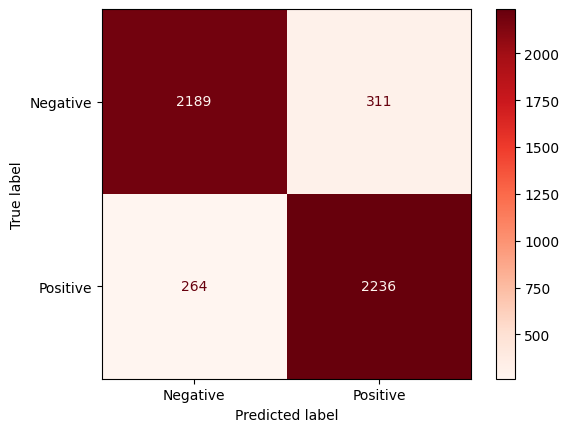

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(Y_Test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive']).plot(cmap='Reds')

# Store Model as Pickle

In [40]:
with open('Model.pkl', 'wb') as f:
    pickle.dump(Model, f)

In [42]:
with open('Model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

X_New = X_Test[2].reshape(1, -1)  # Ensure correct shape for prediction
prediction = loaded_model.predict(X_New)
print("The Prediction is : ", prediction)

if prediction[0] == 0:
    print('This Movie has Negative Review')
else:
    print('This Movie has Positive Review')

The Prediction is :  [1]
This Movie has Positive Review
